<a href="https://colab.research.google.com/github/Saleti-Thrinadh-3/Machine-Learning/blob/main/naive_bayes_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
#load the dataset
ds=load_iris()

In [4]:
#display the names of the columns
ds.feature_names,ds.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [8]:
#display first five rows 
ds.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
ds.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
#converting raw data into dataframes
x=pd.DataFrame(ds.data)
y=pd.DataFrame(ds.target)

In [28]:
#display the shape of features and target
x.shape,y.shape

((150, 4), (150, 1))

In [34]:
#check any null values are occurred
x.isnull().sum(),y.isnull().sum()

(0    0
 1    0
 2    0
 3    0
 dtype: int64,
 0    0
 dtype: int64)

In [44]:
x.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
#display basic information of the dataframe
x.info(),y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


(None, None)

In [29]:
#split the dataset into trained and tested datasets
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=21)

In [30]:
#display the shape 
xtrain.shape,xtest.shape

((112, 4), (38, 4))

In [31]:
#train the model
nb=GaussianNB()
nb.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [37]:
#predict the model
ypred=nb.predict(xtrain)
ypred1=nb.predict(xtest)

In [39]:
#display accuracy of the model
nb.score(xtrain,ytrain),nb.score(xtest,ytest)

(0.9642857142857143, 0.9210526315789473)

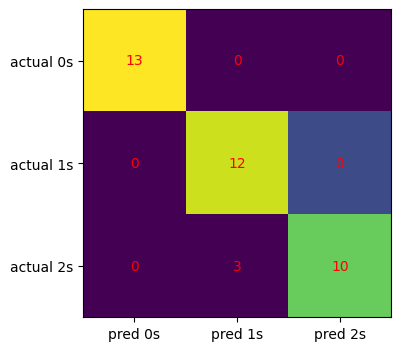

In [46]:
#display confusion matrix using plots
cm=confusion_matrix(ytest,ypred1)
fig,dm=plt.subplots(figsize=(4,4))
dm.imshow(cm)
dm.grid(False)
dm.xaxis.set(ticks=(0,1,2),ticklabels=('pred 0s','pred 1s','pred 2s'))
dm.yaxis.set(ticks=(0,1,2),ticklabels=('actual 0s','actual 1s','actual 2s'))
for i in range(3):
  for j in range(3):
    dm.text(i,j,cm[i,j],ha='center',va='center',color='red')

In [47]:
#display the classification report of the model
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.80      0.89        15
           2       0.77      1.00      0.87        10

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.92        38
weighted avg       0.94      0.92      0.92        38

